# Sprint1課題　機械学習フロー

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler #　標準化モジュール
from sklearn.model_selection import train_test_split # testとtrain分割
from sklearn.neighbors import KNeighborsClassifier # 最近傍法
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score # リコールスコア
from sklearn.metrics import f1_score # f1
from sklearn.metrics import confusion_matrix # 混合行列
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.metrics import mean_squared_error # 平均二乗誤差
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold # クロスバリデーション
from sklearn.model_selection import GridSearchCV # グリッドサーチ
from sklearn.metrics import roc_auc_score # AUC

## 【問題1】クロスバリデーション

In [3]:
'''
データセットファイルの読み込み
'''
df_first = pd.read_csv("../kaggle/home-credit-default-risk/application_train.csv")

In [3]:
df_first.shape

(307511, 122)

In [4]:
# データサイズを小さくするため、特定の行のみ残す（AMT_INCOME_TOTAL 、DAYS_EMPLOYED）

df = df_first.loc[:, ["TARGET","AMT_INCOME_TOTAL", "DAYS_EMPLOYED"]]
df.head()

,TARGET,AMT_INCOME_TOTAL,DAYS_EMPLOYED
0,1,202500.0,-637
1,0,270000.0,-1188
2,0,67500.0,-225
3,0,135000.0,-3039
4,0,121500.0,-3038


In [5]:
# X（np.array）,y（np.array)に格納
X = df.drop("TARGET", axis=1)
X = np.array(X)
print(X.shape)

y = df["TARGET"]
y = np.array(y)
print(y.shape)

(307511, 2)
(307511,)


In [6]:
# トレーニングデータとテストデータに分割

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(230633, 2)
(76878, 2)
(230633,)
(76878,)


In [7]:
# ロジスティック回帰

# 学習
logi = LogisticRegression(random_state=0, solver='saga',
                         multi_class='multinomial').fit(X_train, y_train)

# 推定
logi_pred = logi.predict_proba(X_test)
print("推定\n{}".format(logi_pred))
print(logi_pred.shape)
print(y_test.shape)

推定
[[0.97958861 0.02041139]
 [0.89998247 0.10001753]
 [0.82380553 0.17619447]
 ...
 [0.9669152  0.0330848 ]
 [0.92177994 0.07822006]
 [0.82483738 0.17516262]]
(76878, 2)
(76878,)


In [8]:
# 評価
print("AUC    :{}".format(roc_auc_score(y_test, logi_pred[:,1], average='weighted')) )

AUC    :0.5424080883087148


In [9]:
# クロスバリデーションを行う

kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [153756 153757 153758 ... 307508 307509 307510] TEST: [     0      1      2 ... 153753 153754 153755]
TRAIN: [     0      1      2 ... 153753 153754 153755] TEST: [153756 153757 153758 ... 307508 307509 307510]


In [10]:
# クロスバリデーションした上でのロジスティック回帰

# 学習
logi = LogisticRegression(random_state=0, solver='saga',
                         multi_class='multinomial').fit(X_train, y_train)

# 推定
logi_pred = logi.predict_proba(X_test)
print("推定\n{}".format(logi_pred))
print(logi_pred.shape)
print(y_test.shape)
print("AUC    :{}".format(roc_auc_score(y_test, logi_pred[:,1], average='weighted')) )

推定
[[0.92440238 0.07559762]
 [0.93536304 0.06463696]
 [0.85555017 0.14444983]
 ...
 [0.87999803 0.12000197]
 [0.90391086 0.09608914]
 [0.88853112 0.11146888]]
(153755, 2)
(153755,)
AUC    :0.5451272441205581


## 考察
クロスバリデーションを行うことで、ロジスティック回帰の精度がAUC    :0.5389779721820762からAUC    :0.5765823435396058に上がった

## 【問題2】グリッドサーチ

In [11]:
# グリッドサーチをおこなう

# 最適化したいパラメータ
parameters = {"C": [1, 10]}　# パラメータ設定。Cはlogiのパラメータの一部。
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'),parameters, cv=3,scoring="roc_auc").fit(X_train, y_train)


In [12]:
grid_search

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [13]:
# 最適化したパラメータで推定

print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross-validation score : {:.3f}".format(grid_search.best_score_))


Best parameters : {'C': 1}
Best cross-validation score : 0.543


## 【問題3】Kernelからの調査

KaggleのKernelから様々なアイデアを見つけ出して、列挙してください。

### 【問題4】高い汎化性能のモデル作成

## 1:データフレームのメモリ使用量を減らすための関数

In [14]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [15]:
df_first, NAlist = reduce_mem_usage(df_first)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 286.22705078125  MB
******************************
Column:  SK_ID_CURR
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  TARGET
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  CNT_CHILDREN
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  AMT_INCOME_TOTAL
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  AMT_CREDIT
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  AMT_ANNUITY
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  AMT_GOODS_PRICE
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  REGION_POP

dtype after:  float32
******************************
******************************
Column:  FLOORSMIN_MEDI
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  LANDAREA_MEDI
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  LIVINGAPARTMENTS_MEDI
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  LIVINGAREA_MEDI
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  NONLIVINGAPARTMENTS_MEDI
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  NONLIVINGAREA_MEDI
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  TOTALAREA_MODE
dtype before:  float64
dtype after:  float32
******************************
*********

## 2）低分散フィルタ、高相関フィルタで前処理

In [16]:
# 最頻値で欠損穴埋め＆低分散フィルタ

columns = df_first.columns

for col in columns:
    df_first[col].fillna(df_first[col].mode()[0],inplace = True) # 最頻値で欠損値を穴埋め


In [17]:
# 欠損値の有無を確認
df_first.isnull().sum()/len(df_first)*100

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_REGISTRATION             0.0
DAYS_ID_PUBLISH               0.0
OWN_CAR_AGE                   0.0
FLAG_MOBIL                    0.0
FLAG_EMP_PHONE                0.0
FLAG_WORK_PHONE               0.0
FLAG_CONT_MOBILE              0.0
FLAG_PHONE                    0.0
FLAG_EMAIL                    0.0
OCCUPATION_TYPE               0.0
CNT_FAM_MEMBER

In [18]:
# 全ての特徴量の分散を計算（.var()）
df_first.var().sort_values(ascending=True)

FLAG_MOBIL                      3.251916e-06
FLAG_DOCUMENT_12                6.503811e-06
FLAG_DOCUMENT_10                2.276297e-05
FLAG_DOCUMENT_2                 4.227326e-05
FLAG_DOCUMENT_4                 8.129156e-05
REGION_POPULATION_RELATIVE      1.912841e-04
FLAG_DOCUMENT_7                 1.918269e-04
FLAG_DOCUMENT_17                2.665869e-04
FLAG_DOCUMENT_21                3.348363e-04
FLAG_DOCUMENT_20                5.070432e-04
FLAG_DOCUMENT_19                5.947485e-04
FLAG_DOCUMENT_15                1.208253e-03
FLAG_CONT_MOBILE                1.863122e-03
FLAG_DOCUMENT_14                2.927867e-03
FLAG_DOCUMENT_13                3.512662e-03
FLAG_DOCUMENT_9                 3.880631e-03
FLAG_DOCUMENT_11                3.896764e-03
FLAG_DOCUMENT_18                8.063723e-03
FLAG_DOCUMENT_16                9.829565e-03
FLAG_DOCUMENT_5                 1.488649e-02
REG_REGION_NOT_LIVE_REGION      1.491488e-02
LIVE_REGION_NOT_WORK_REGION     3.900570e-02
EXT_SOURCE

In [19]:
# しきい値を３０％に設定
numeric = df_first.select_dtypes(include=[np.number]) # オブジェクト列を削除
#print(numeric)
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(len(var)-1):
    if var[i]>=30:   #setting the threshold as 30%
       variable.append(numeric[i+1])
print("３０％以上の分散率の特徴量\n{}".format(variable))

３０％以上の分散率の特徴量
['TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [20]:
# 大きい分散の特徴量のみに絞る

df_1 = df_first.loc[:, [
    'TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
    'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
    'FLAG_MOBIL', 'FLAG_DOCUMENT_2'
]]
print(df_1.shape)

(307511, 11)


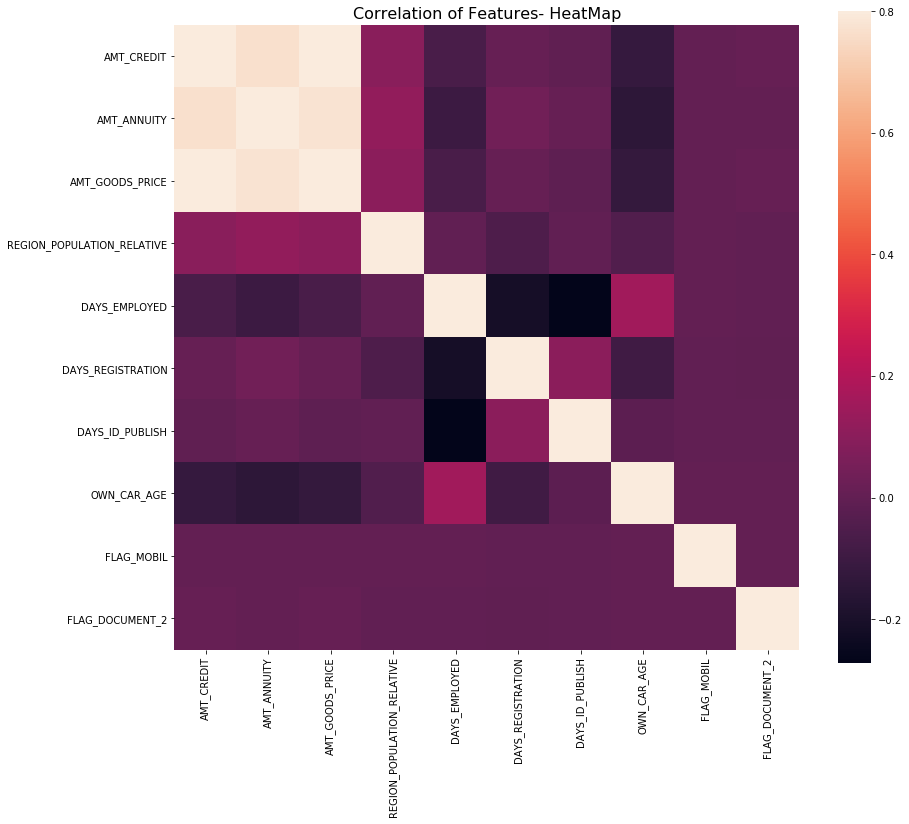

In [21]:
# 高相関フィルタ(High Correlation Filter)

df_2 = df_1.drop('TARGET', 1)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features- HeatMap',y=1,size=16)
sns.heatmap(df_2.corr(),square = True,  vmax=0.8)

相関が０.６以上の特徴量:<br>
'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [22]:
# 'AMT_ANNUITY', 'AMT_GOODS_PRICE'の列は削る

df_3 = df_2.loc[:, [
    'AMT_CREDIT',
    'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', #'OWN_CAR_AGE',
    'FLAG_MOBIL','FLAG_DOCUMENT_2'
]]

print(df_3.shape)

(307511, 7)


In [23]:
# 特徴量を絞ったデータをX（np.array）,y（np.array)に格納
#X = df_3.drop("TARGET", axis=1)
X = np.array(df_3)
print(X.shape)

#y = df_3["TARGET"]
y = np.array(y)
print(y.shape)

(307511, 7)
(307511,)


In [24]:
# クロスバリデーションを行う

kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [153756 153757 153758 ... 307508 307509 307510] 
TEST: [     0      1      2 ... 153753 153754 153755]
TRAIN: [     0      1      2 ... 153753 153754 153755] 
TEST: [153756 153757 153758 ... 307508 307509 307510]


In [25]:
# さらにグリッドサーチをおこなったロジスティック回帰

# 最適化したいパラメータ
parameters = {"C": [1, 10]}
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs'),
                           parameters, cv=3,scoring="roc_auc").fit(X_train, y_train)

# 最適化したパラメータで推定

print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross-validation score : {:.3f}".format(grid_search.best_score_))

Best parameters : {'C': 1}
Best cross-validation score : 0.574


In [26]:
# グリッドサーチなしのロジスティック回帰

# 学習
logi = LogisticRegression(random_state=0, solver='saga',
                         multi_class='multinomial').fit(X_train, y_train)

# 推定
logi_pred = logi.predict_proba(X_test)
print("推定\n{}".format(logi_pred))
print(logi_pred.shape)
print(y_test.shape)
print("AUC    :{}".format(roc_auc_score(y_test, logi_pred[:,1], average='weighted')) )

推定
[[0.99456965 0.00543035]
 [0.9103681  0.0896319 ]
 [0.96075668 0.03924332]
 ...
 [0.96443672 0.03556328]
 [0.76482544 0.23517456]
 [0.87167797 0.12832203]]
(153755, 2)
(153755,)
AUC    :0.5766323674267556


/Users/suginokaori/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 【問題5】最終的なモデルの選定

## 1)  データフレームメモリ削減
## 2）低分散フィルタ、高相関フィルタで前処理
上記2つの工夫をしました。かつ、クロスバリデーションあり、グリッドサーチなしが最も精度が良くなったため、テストデータを推定し、kaggleに提出しました。

また、１のメモリ削減では下記の通り４１％データメモリを削減できました。

Memory usage of properties dataframe is : 286.22705078125  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  117.89274406433105  MB
This is  41.18854026638837 % of the initial size

In [31]:
# テストデータを読み込む
'''
testデータセットファイルの読み込み
'''
df_test_1 = pd.read_csv("application_test.csv")

# #カテゴリカルデータをダミー変数化
# df_test = pd.get_dummies(df_test)
# print(df_test.shape)
# # display(df_test.head())

df_test = df_test_1.replace({'NaN': None, 'nan': None})

# 欠損値がある行と列を削除
df_test = df_test.dropna(how='any', axis=1)
df_test = df_test.dropna(how='any', axis=0)
print(df_test.shape)

print(df_test)
#df_test.isnull()

(48744, 57)
       SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
5          100042         Cash loans           F            Y               Y   
6          100057         Cash loans           M            Y               Y   
7          100065         Cash loans           M            N               Y   
8          100066         Cash loans           F            N               Y   
9          100067         Cash loans           F            Y               Y   
10         100074         Cash loans           F            N               Y   
11         10009

In [32]:
#工夫２より、特徴量を絞る
df_test = df_test.loc[:, [
    'AMT_CREDIT',
    'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', #'OWN_CAR_AGE',
    'FLAG_MOBIL','FLAG_DOCUMENT_2'
]]

print(df_test)

#ndarrayに変換
X_df_test = np.array(df_test)
print(X_df_test.shape)
print(X_df_test)

       AMT_CREDIT  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0        568800.0                    0.018850          -2329   
1        222768.0                    0.035792          -4469   
2        663264.0                    0.019101          -4458   
3       1575000.0                    0.026392          -1866   
4        625500.0                    0.010032          -2191   
5        959688.0                    0.025164         -12009   
6        499221.0                    0.022800          -2580   
7        180000.0                    0.005144          -1387   
8        364896.0                    0.046220          -1013   
9         45000.0                    0.018634          -2625   
10       675000.0                    0.003122         365243   
11       261621.0                    0.008019          -3555   
12       296280.0                    0.018634           -929   
13       360000.0                    0.014520          -3578   
14       157500.0                    0.0

In [33]:
# グリッドサーチなしのロジスティック回帰

# # 学習
# logi = LogisticRegression(random_state=0, solver='saga',
#                          multi_class='multinomial').fit(X_train, y_train)

# 推定
logi_pred = logi.predict_proba(X_df_test)
print("推定\n{}".format(logi_pred))
print(logi_pred.shape)
#print(y_test.shape)
#print("AUC    :{}".format(roc_auc_score(y_test, logi_pred[:,1], average='weighted')) )

推定
[[0.86452298 0.13547702]
 [0.89121112 0.10878888]
 [0.90007952 0.09992048]
 ...
 [0.77764294 0.22235706]
 [0.77638406 0.22361594]
 [0.84099934 0.15900066]]
(48744, 2)


In [35]:
# kaggleに提出するためのCSVファイルに加工

svm_pred_filter2 = pd.DataFrame(logi_pred[:,1])
svm_pred_filter2 = svm_pred_filter2.abs()
svm_pred_filter2 = svm_pred_filter2.rename(columns={0:"TARGET"})
svm_pred_filter2 = pd.concat([df_test_1["SK_ID_CURR"], svm_pred_filter2], axis=1, join='inner')
#svm_pred = svm_pred.set_index("SK_ID_CURR", inplace = True)
svm_pred_filter2.head()

,SK_ID_CURR,TARGET
0,100001,0.135477
1,100005,0.108789
2,100013,0.099920
3,100028,0.022753
4,100038,0.069171


In [38]:
# CSV ファイル (svm_pred.csv) として出力
svm_pred_filter2.to_csv("svm_pred_filter2.csv", index=False)

#Kaggleに提出しました
#Score 0.56921